In [ ]:
# Дипломная работа по курсу «Python для анализа данных»

In [94]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *
from scipy.stats import pearsonr

In [245]:
# Загрузить файл hr.csv (можно найти во сложении к заданию)
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [27]:
# Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
df.isnull().sum() # отсутствующих значений нет
df.describe()
# mean - среднее, 50 % - медиана, min - мин, max - макс, std - стандартное отклонение

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [35]:
# для примера найдем моду одной из переменных (уровень удовлетворенности)
print('Значение моды: ', statistics.mode(df['satisfaction_level']))

Значение моды:  0.1


In [48]:
# Рассчитать и визуализировать корреляционную матрицу для переменных
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.105021,-0.14297,-0.0200481,-0.100866,0.0586972,-0.388375,0.0256052
last_evaluation,0.105021,1,0.349333,0.339742,0.131591,-0.00710429,0.00656712,-0.00868377
number_project,-0.14297,0.349333,1,0.417211,0.196786,-0.00474055,0.0237872,-0.00606396
average_montly_hours,-0.0200481,0.339742,0.417211,1,0.127755,-0.0101429,0.0712872,-0.00354441
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1,0.00212042,0.144822,0.0674329
Work_accident,0.0586972,-0.00710429,-0.00474055,-0.0101429,0.00212042,1,-0.154622,0.0392454
left,-0.388375,0.00656712,0.0237872,0.0712872,0.144822,-0.154622,1,-0.0617881
promotion_last_5years,0.0256052,-0.00868377,-0.00606396,-0.00354441,0.0674329,0.0392454,-0.0617881,1


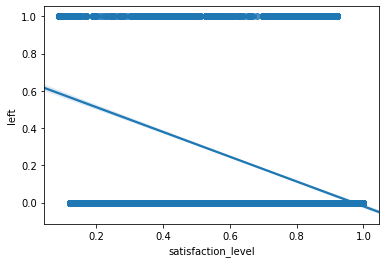

-0.38837498342411414


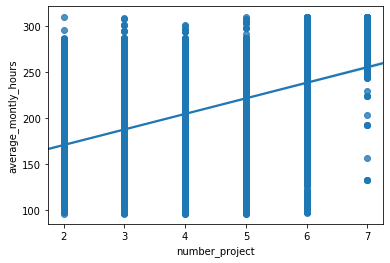

0.4172106344017771


In [276]:
# Визуализировать несколько взаимосвязей между переменными
# на основании предыдущей матрицы рассмотрим более детально корреляцию между 
# satisfaction_level (уровнем удовлетворенности) и left (увольнением)
sns.regplot(x="satisfaction_level", y="left", data=df)
plt.show()
corr, p_value = pearsonr(df['satisfaction_level'], df['left'])
print(corr)
# коэффициент Пирсона в данном случае - 0,39 (прямая убывает,что видно по графику),данный отрицательный коэффициент
# говорит нам об обратной зависимости(чем ниже уровень удовлетворенности, тем больше увольнений)

# аналогично мы можем рассмотреть взаимосвязи между number_project(количество проектов) и 
# average_montly_hours(среднее количество часов в месяц)
sns.regplot(x="number_project", y="average_montly_hours", data=df)
plt.show()
corr, p_value = pearsonr(df['number_project'], df['average_montly_hours'])
print(corr)
# коэффициент Пирсона в данном случае  0,42 (прямая возрастает,что видно по графику),данный положительный коэффициент
# говорит нам о прямой зависимости(чем больше у человека проектов, тем больше он работает)



In [294]:
# С использованием t-test статистики проверить взаимосвязи между несколькими переменными
# возьмем 2 выборки : 1) уровень удовлетворенности работающего человека и 2) уровень удовлетворенности уволенного человека
# нулевая гипотеза в нашем случае: взятые выборки не имеют статистического различия
left_0 = df[df['left']==0]['satisfaction_level']
left_1 = df[df['left']==1]['satisfaction_level']
stats.ttest_ind(left_0,left_1)
stats.median_test(left_0, left_1)
# в начем случае pvalue=0.0 , так как pvalue<=0,05, мы отвергаем нулевую гипотезу (поэтому смело можем утверждать,
# что имеются статистические различия)

(995.4973113381363, 1.7099771824789152e-218, 0.64, array([[6521,  957],
        [4907, 2614]]))

In [114]:
# Рассчитать сколько работников работает в каждом департаменте
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

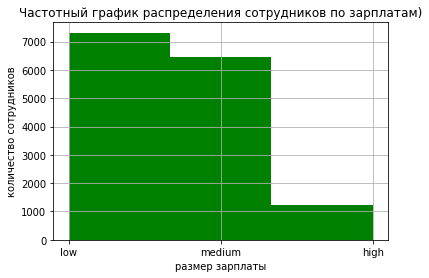

In [257]:
# Показать распределение сотрудников по зарплатам
n, bins, patches = plt.hist(df['salary'], 3, facecolor='g')
plt.xlabel('размер зарплаты')
plt.ylabel('количество сотрудников')
plt.title('Частотный график распределения сотрудников по зарплатам)')
plt.grid(True)
plt.show()
# это похоже на экспоненциальное распределение

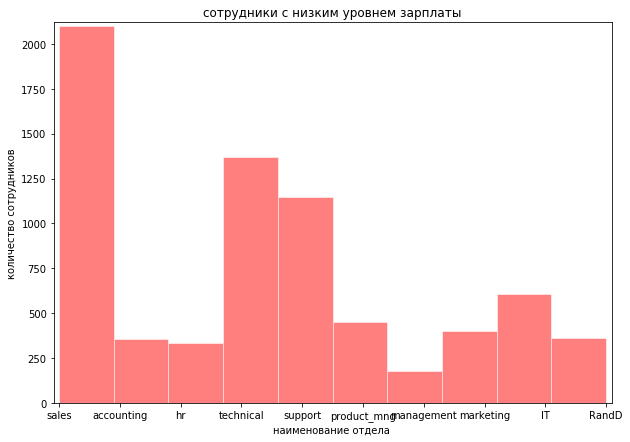

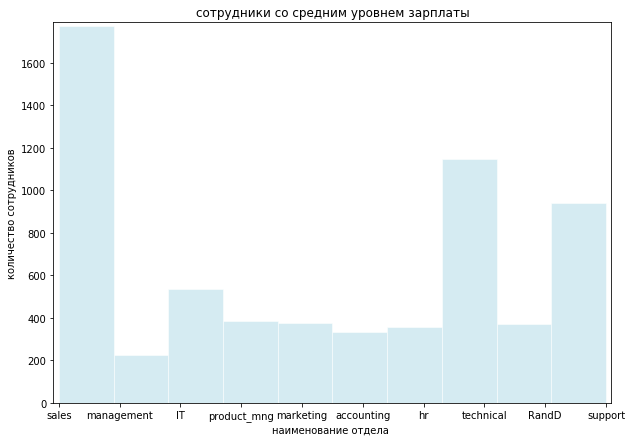

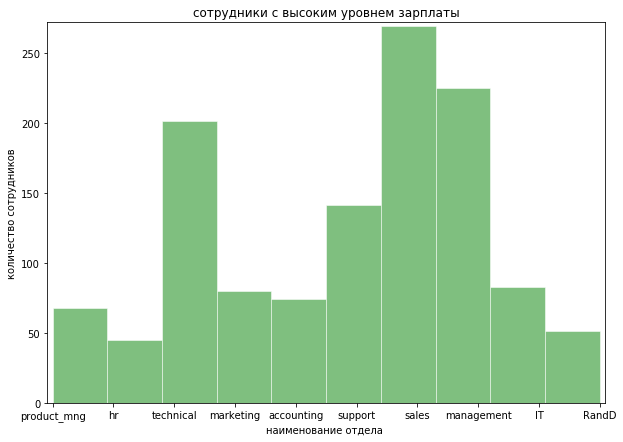

In [168]:
# Показать распределение сотрудников по зарплатам совместно с департаментами
# сделаем 3 графика с разделением по уровню зарплаты
s_low = df[df['salary']=='low']['sales'] # сотрудники с низким уровнем зарплаты
s_medium = df[df['salary']=='medium']['sales'] # сотрудники со средним уровнем зарплаты
s_high = df[df['salary']=='high']['sales'] # сотрудники с высоким уровнем зарплаты

fig, ax = plt.subplots(figsize=(10,7)) 
ax.hist(s_low, color='red',edgecolor='white', alpha=0.5) 
ax.set(title='сотрудники с низким уровнем зарплаты', xlabel = 'наименование отдела ', ylabel = 'количество сотрудников') 
ax.margins(0.01) 
ax.set_ylim(bottom=0) 
plt.show()

fig, ax = plt.subplots(figsize=(10,7)) 
ax.hist(s_medium, color='lightblue',edgecolor='white', alpha=0.5) 
ax.set(title='сотрудники со средним уровнем зарплаты', xlabel = 'наименование отдела ', ylabel = 'количество сотрудников') 
ax.margins(0.01) 
ax.set_ylim(bottom=0) 
plt.show()

fig, ax = plt.subplots(figsize=(10,7)) 
ax.hist(s_high, color='green',edgecolor='white', alpha=0.5) 
ax.set(title='сотрудники с высоким уровнем зарплаты', xlabel = 'наименование отдела ', ylabel = 'количество сотрудников') 
ax.margins(0.01) 
ax.set_ylim(bottom=0) 
plt.show()

In [172]:
# Сколько сотрудников покинули компанию

df['left'].value_counts() 
# здесь мы видим не только количество человек, которые покинули компанию (3571), но и количество работающих(11428)

0    11428
1     3571
Name: left, dtype: int64

In [303]:
# Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
df.groupby('left').mean() 
# отсюда мы можем сделать вывод:
# 1) уровень удовлетворенности у работающих людей выше, чем - у ушедших из компании сотрудников;
# 2) сотрудников, которых повышают за последние 5 лет уходят реже, чем - кого не повышают.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [306]:
# 1-я гипотеза
# возьмем 2 выборки : 1) уровень удовлетворенности работающего человека и 2) уровень удовлетворенности уволенного человека
# нулевая гипотеза в нашем случае: взятые выборки не имеют статистического различия
left_0 = df[df['left']==0]['satisfaction_level']
left_1 = df[df['left']==1]['satisfaction_level']
print('1-я гипотеза',stats.ttest_ind(left_0,left_1))

# в начем случае pvalue=0.0 , так как pvalue<=0,05, мы отвергаем нулевую гипотезу (поэтому смело можем утверждать,
# что имеются статистические различия), в нашем случае - чем ниже уровень удовлетворенности, 
# тем больше сотрудников покидают компанию

# 2-я гипотеза 
# возьмем 2 выборки: 1) работающие сотрудники, которых повысили за последние 5 лет и 
# 2) ушедшие сотрудники, которых повысили за последние 5 лет
# # нулевая гипотеза в нашем случае: взятые выборки не имеют статистического различия
p0 = df[df['left']==0]['promotion_last_5years']
p1 = df[df['left']==1]['promotion_last_5years']
print('2-я гипотеза',stats.ttest_ind(p0,p1))

# в начем случае pvalue=0 , так как pvalue<=0,05, мы отвергаем нулевую гипотезу (поэтому смело можем утверждать,
# что имеются статистические различия), в нашем случае - чем больше в компании повышают сотрудников, 
# тем меньше сотрудников покидают компанию



1-я гипотеза Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)
2-я гипотеза Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)
